# Environment

In [1]:
import gc
import os
import sys
import importlib
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt 

sys.path.insert(0, "/home/michal.kubacki/Githubs/Re-MEND/code/External_Datasets/GeneSet_Derivation/Herring_celloracle/helpers")

import config
importlib.reload(config)
from config import *
n_cpus = 32

In [2]:
reference = "hg19"

neurons_set = "all_excitatory_all_ages"
# neurons_set = "all_excitatory"

cells_dict = {
    "all_excitatory"            :   ['L5-6_TLE4', 'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'PN_dev'],
    "all_excitatory_all_ages"   :   ['L5-6_TLE4', 'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'PN_dev']
}

ages_dict = {
    "all_excitatory"            :   ['1m','3m','6m','10m','1y','2y','4y','ga22','ga24'],
    "all_excitatory_all_ages"   :   ['1m','3m','6m','10m','1y','2y','4y','6y','10y','16y','20y','40y','ga22','ga24']
}

output_dir, input_dir, root_dir, tmp_dir, in_dir_from_scenic = set_custom_folders(reference, neurons_set)

sel_celltypes  = cells_dict[neurons_set]
sel_ages = ages_dict[neurons_set]

root_dir: /group/testa/michal.kubacki/herring
out_dir: /group/testa/michal.kubacki/herring/output_hg19_all_excitatory_all_ages/celloracle
in_dir: /group/testa/michal.kubacki/herring/data
tmp_dir: /group/testa/michal.kubacki/herring/celloracle/tmp


In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

# Load data

In [4]:
adata = sc.read_h5ad(os.path.join(input_dir, 'Processed_data_RNA-all_full-counts-and-downsampled-CPM.h5ad'))
adata_metadata = pd.read_csv(os.path.join(in_dir_from_scenic, 'cells_data.csv'), sep=",", index_col = 0)

In [5]:
adata_metadata.head()

,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,nFrags,...,predictedScore,FRIP,ReadsInPeaks,age,chem,major_clust,age_mapped,old_index,id,predictedCellFormatted
TTGCGGGCATTGCGAT-1-3m,3.187,1534.0,9410.0,981.0,0.052331,1.0,0.939366,8204.0,46360.0,89909.0,...,0.335881,0.420796,74502.0,86d,v3,L2-3_CUX2,3m,TTGCGGGCATTGCGAT-1,TTGCGGGCATTGCGAT-1-3m,GCTACCTCAGCTTCCT-1-3m
ACATGCATCAATTCCT-1-ga24,2.553,1012.0,7014.0,700.0,0.047747,1.0,0.786993,5692.0,41102.0,73449.0,...,0.541803,0.384517,56111.0,ga34,v3,L5-6_TLE4,ga24,ACATGCATCAATTCCT-1,ACATGCATCAATTCCT-1-ga24,TCCTTCTTCCTAAACG-1-ga24
CCGTGAGCAGGTAGCA-1-6m,2.914,1167.0,7173.0,1268.0,0.050797,1.0,0.954166,6839.0,36130.0,70604.0,...,0.439298,0.398352,54136.0,179d,v3,L5-6_TLE4,6m,CCGTGAGCAGGTAGCA-1,CCGTGAGCAGGTAGCA-1-6m,CCTTTGGGTGTATTCG-1-6m
TTACTCACAACTCCCT-1-ga24,2.684,1095.0,7214.0,1044.0,0.051844,1.0,0.771999,7073.0,39263.0,69574.0,...,0.372978,0.361398,49385.0,ga34,v3,L5-6_TLE4,ga24,TTACTCACAACTCCCT-1,TTACTCACAACTCCCT-1-ga24,TATACCTAGGGCAACT-1-ga24
CCACAGGAGACACGGT-1-ga24,3.119,1208.0,7018.0,737.0,0.052616,1.0,1.795448,8900.0,23857.0,66691.0,...,0.326004,0.442014,57643.0,ga34,v3,L5-6_TLE4,ga24,CCACAGGAGACACGGT-1,CCACAGGAGACACGGT-1-ga24,TATACCTAGGGCAACT-1-ga24


In [6]:
print(f"adata_metadata.age: {adata_metadata.age[:5]}")
print(f"adata_metadata.age_mapped: {adata_metadata.age_mapped[:5]}")

adata_metadata.age: TTGCGGGCATTGCGAT-1-3m       86d
ACATGCATCAATTCCT-1-ga24    ga34
CCGTGAGCAGGTAGCA-1-6m      179d
TTACTCACAACTCCCT-1-ga24    ga34
CCACAGGAGACACGGT-1-ga24    ga34
Name: age, dtype: object
adata_metadata.age_mapped: TTGCGGGCATTGCGAT-1-3m        3m
ACATGCATCAATTCCT-1-ga24    ga24
CCGTGAGCAGGTAGCA-1-6m        6m
TTACTCACAACTCCCT-1-ga24    ga24
CCACAGGAGACACGGT-1-ga24    ga24
Name: age_mapped, dtype: object


In [7]:
print(adata.obs.age.head())

AAACCTGAGAGTCGGT-RL1612_34d_v2    34d
AAACCTGAGCCGCCTA-RL1612_34d_v2    34d
AAACCTGAGTCGAGTG-RL1612_34d_v2    34d
AAACCTGAGTGAACAT-RL1612_34d_v2    34d
AAACCTGCAAGGACTG-RL1612_34d_v2    34d
Name: age, dtype: category
Categories (24, object): ['2d', '2yr', '3yr', '4yr', ..., '627d', 'ga22', 'ga24', 'ga34']


In [8]:
age_mapping = dict(zip(adata_metadata.age, adata_metadata.age_mapped))

# Apply the mapping to adata.obs.age
adata.obs['age_mapped'] = adata.obs.age.map(age_mapping)

# If there are any values in adata.obs.age that don't have a mapping,
# they will become NaN. To keep the original values for these cases, use:
adata.obs['age_mapped'] = adata.obs.age.map(age_mapping).fillna(adata.obs.age)

# Display the first few rows to verify the mapping
print(adata.obs[['age', 'age_mapped']].head())

# how many values were mapped vs. unmapped:
mapped_count = adata.obs.age_mapped.notna().sum()
total_count = len(adata.obs.age)
print(f"Mapped {mapped_count} out of {total_count} values")
print(f"Mapping rate: {mapped_count/total_count:.2%}")

                                age age_mapped
AAACCTGAGAGTCGGT-RL1612_34d_v2  34d        34d
AAACCTGAGCCGCCTA-RL1612_34d_v2  34d        34d
AAACCTGAGTCGAGTG-RL1612_34d_v2  34d        34d
AAACCTGAGTGAACAT-RL1612_34d_v2  34d        34d
AAACCTGCAAGGACTG-RL1612_34d_v2  34d        34d
Mapped 154748 out of 154748 values
Mapping rate: 100.00%


In [9]:
adata.obs.age_mapped.unique()

array(['34d', '2y', '8yr', '1m', '3m', '16y', 'ga22', '6y', 'ga24', '6m',
       '4y', '10y', '10m', '20y', '40y', '1y', '12yr', '14yr', '25yr'],
      dtype=object)

In [10]:
print(adata.shape)
adata = adata[adata.obs['chem']=='v3']
print(adata.shape)

(154748, 26747)
(141385, 26747)


In [11]:
# sel_celltypes = adata[adata.obs.cell_type == "PN", :].obs.major_clust.unique()
# sel_celltypes

In [12]:
adata = adata[adata.obs.age_mapped.isin(sel_ages)]
print(adata.shape)

(126822, 26747)


In [13]:
adata = adata[adata.obs['major_clust'].isin(sel_celltypes)]
print(adata.shape)

(49758, 26747)


In [14]:
adata.obs.age.unique()

['2d', '2yr', '86d', '16yr', 'ga22', ..., '20yr', '40yr', '422d', '3yr', '17yr']
Length: 19
Categories (19, object): ['2d', '2yr', '3yr', '4yr', ..., '627d', 'ga22', 'ga24', 'ga34']

In [15]:
for cell in adata.obs['major_clust'].unique():
    print(f"{cell}: {(adata.obs['major_clust']==cell).sum()}")

L5-6_TLE4: 7382
L2-3_CUX2: 20364
L4_RORB: 11512
L5-6_THEMIS: 6673
PN_dev: 3827


# Filter data

/home/michal.kubacki/.conda/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


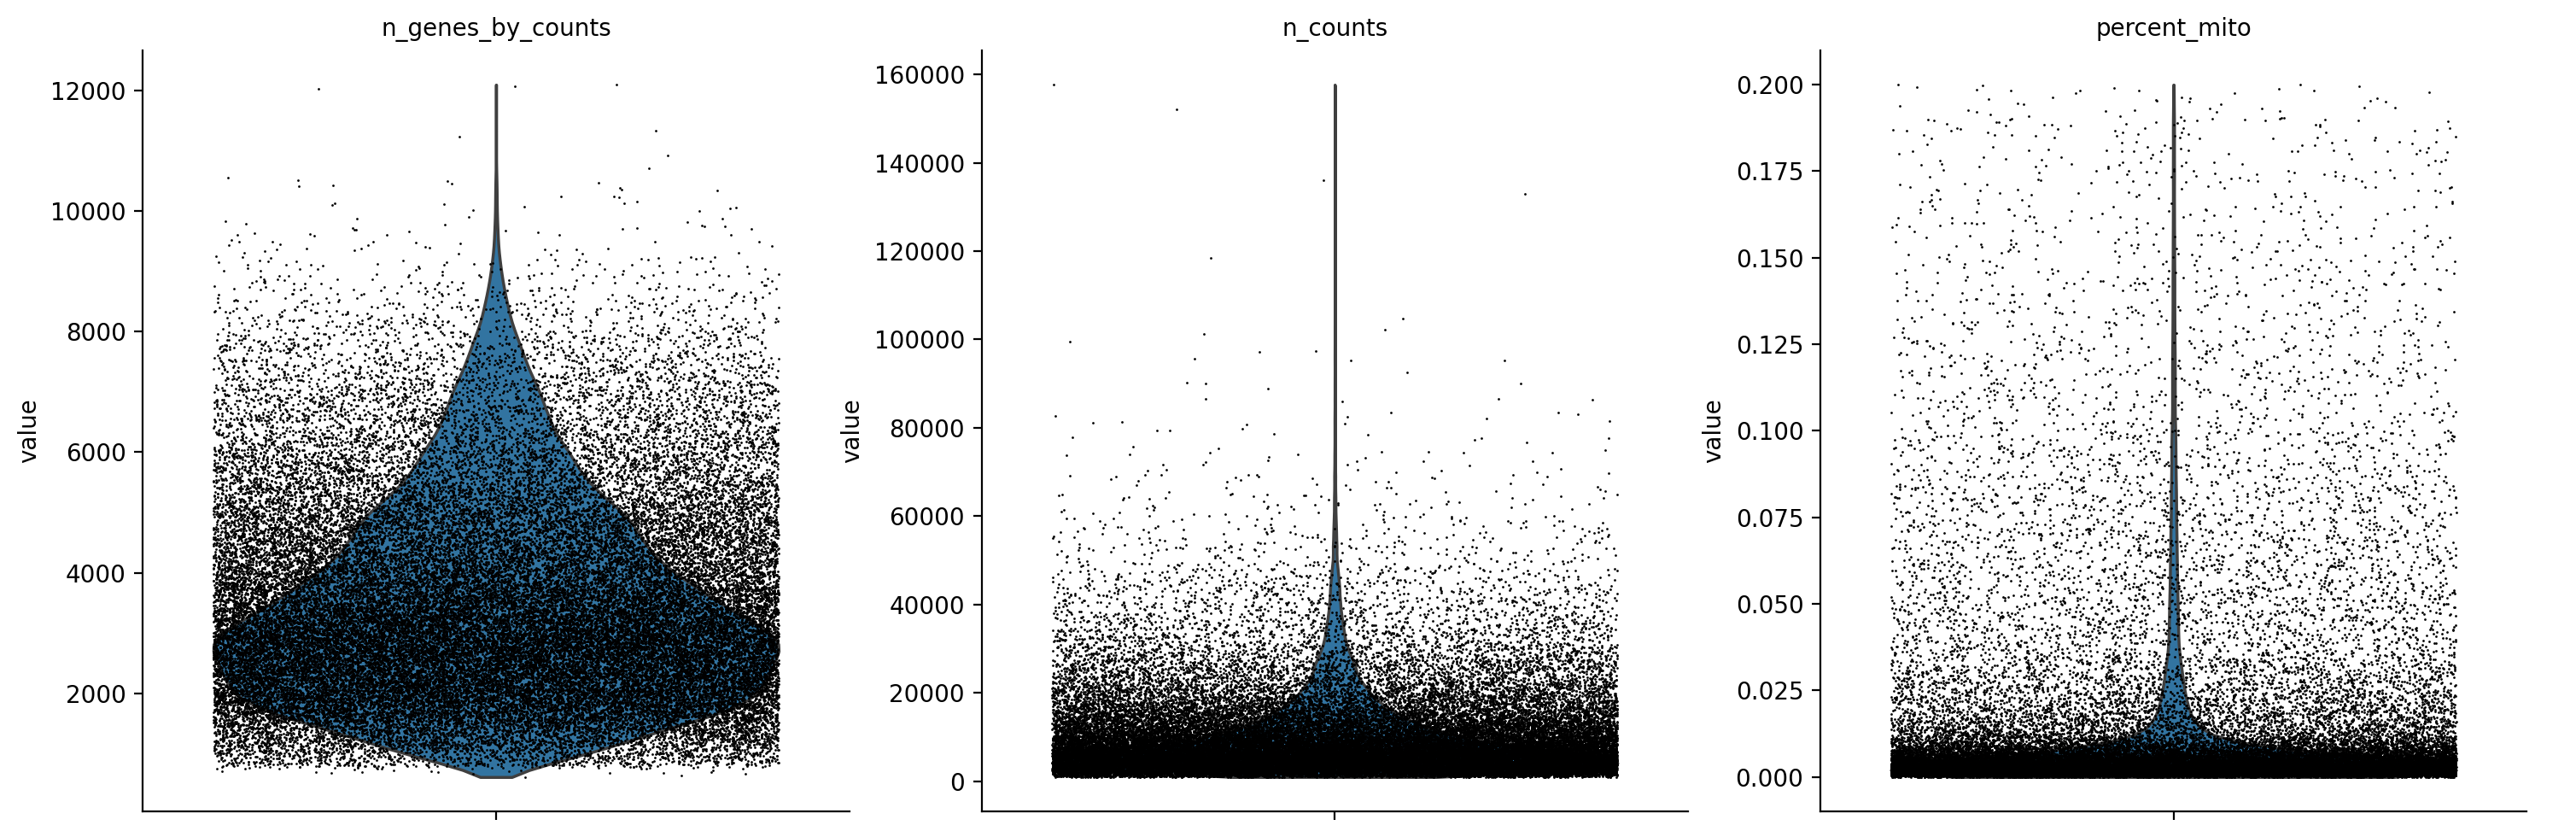

In [16]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "n_counts", "percent_mito"],
    jitter=0.4,
    multi_panel=True,
)

In [17]:
print(f"Number of cells before filtering: {adata.n_obs}")

cell_type_to_exclude = 'none'

# percentiles for filtering criteria
min_genes_percentile = 2
max_genes_percentile = 98
min_counts_percentile = 2
max_counts_percentile = 98
max_mito_percent = 30

min_genes = np.percentile(adata.obs['n_genes_by_counts'], min_genes_percentile)
max_genes = np.percentile(adata.obs['n_genes_by_counts'], max_genes_percentile)
min_counts = np.percentile(adata.obs['n_counts'], min_counts_percentile)
max_counts = np.percentile(adata.obs['n_counts'], max_counts_percentile)
max_mito = np.percentile(adata.obs['percent_mito'], max_mito_percent)

mask = (adata.obs['n_genes_by_counts'] >= min_genes) & (adata.obs['n_genes_by_counts'] <= max_genes) & \
        (adata.obs['n_counts'] >= min_counts) & (adata.obs['n_counts'] <= max_counts) & \
        (adata.obs['percent_mito'] <= max_mito) | (adata.obs.major_clust==cell_type_to_exclude)

adata = adata[mask, :]

print(f"Number of cells after filtering: {adata.n_obs}")

Number of cells before filtering: 49758
Number of cells after filtering: 14442


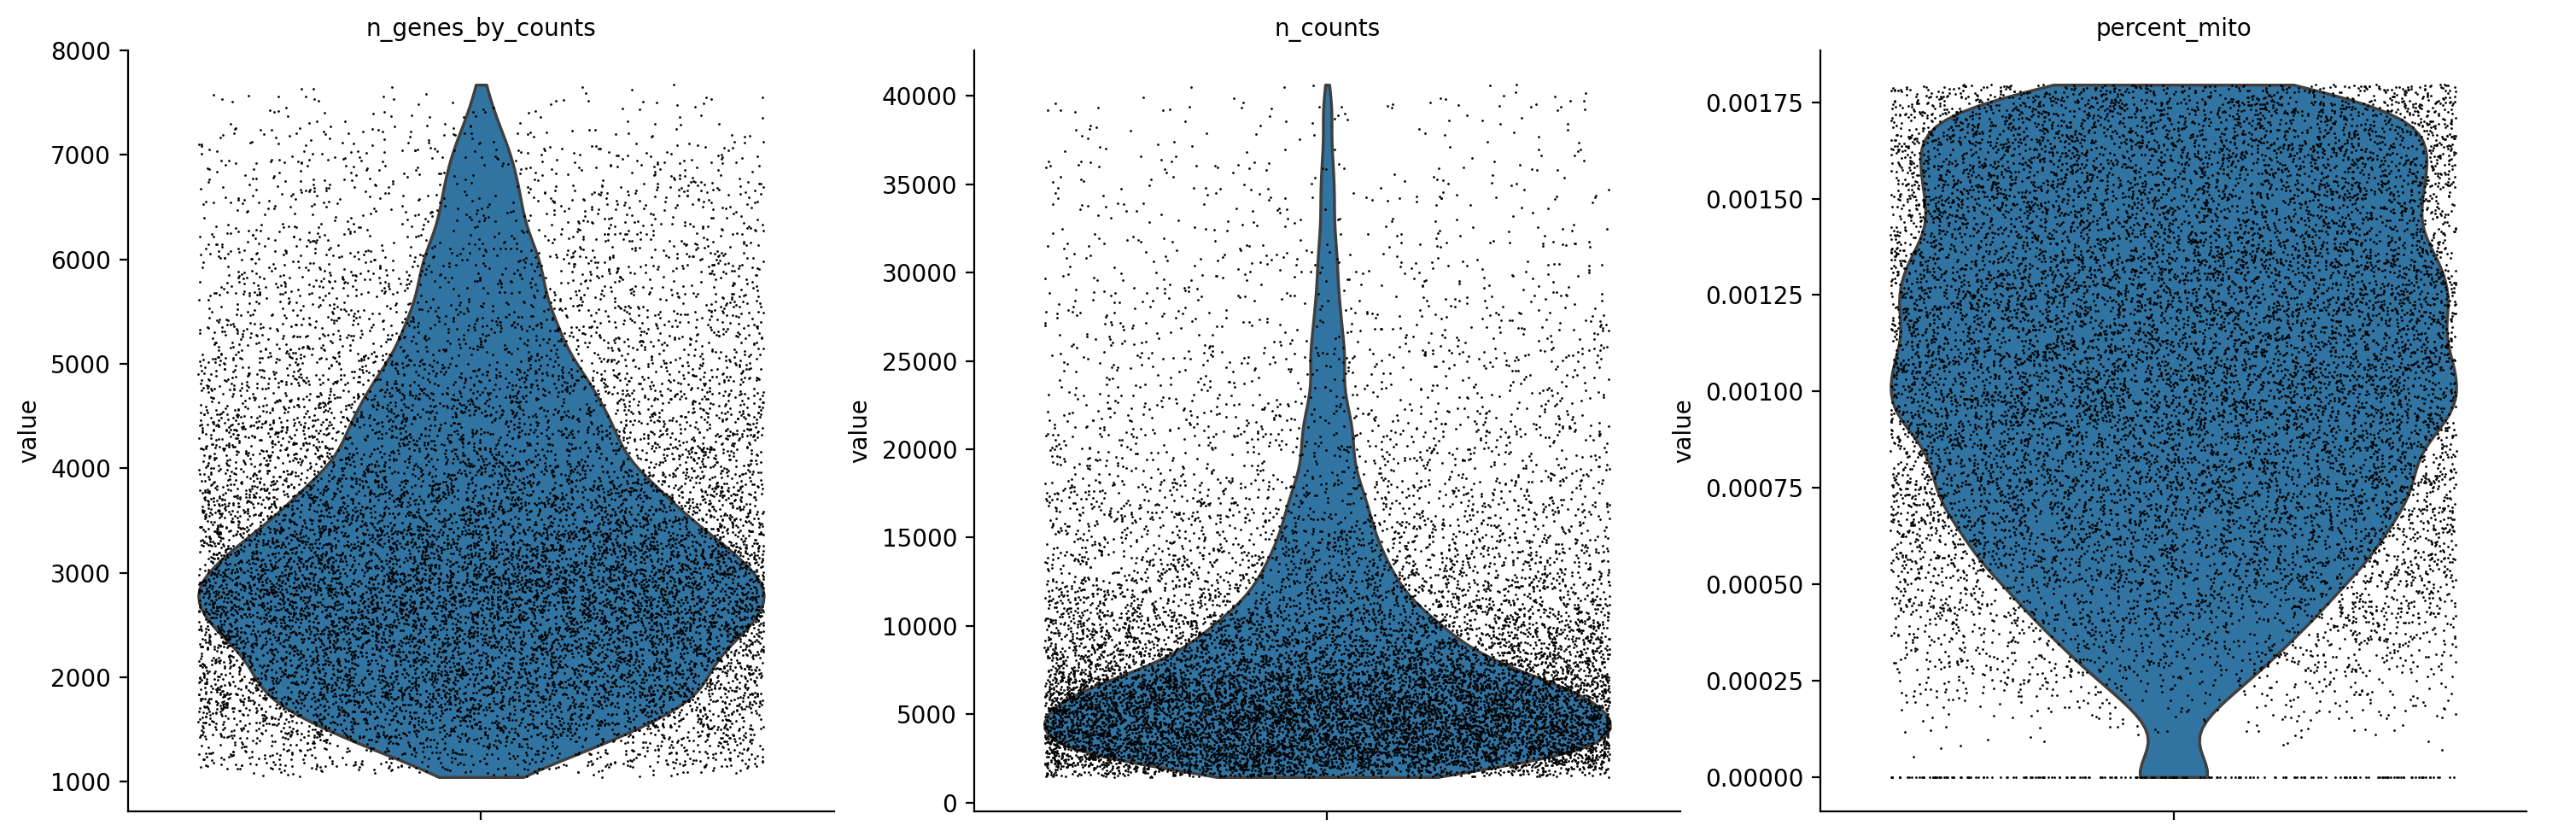

In [18]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "n_counts", "percent_mito"],
    jitter=0.4,
    multi_panel=True,
)

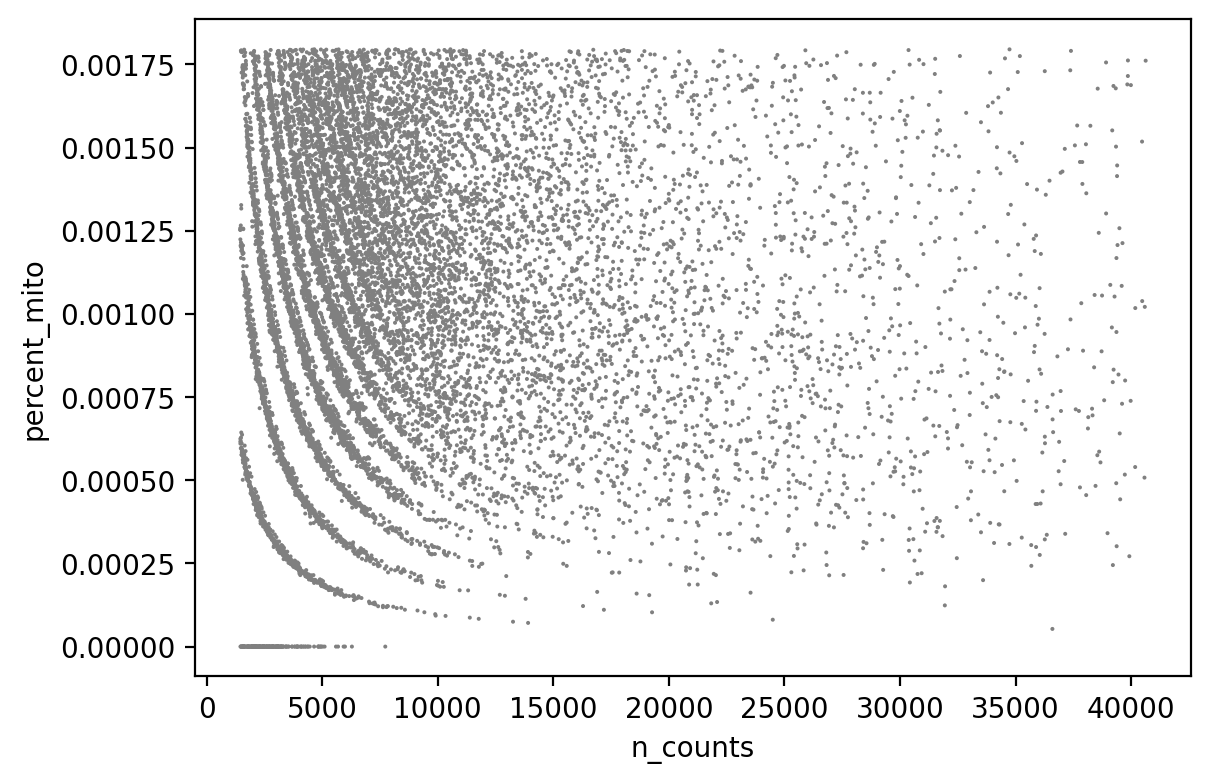

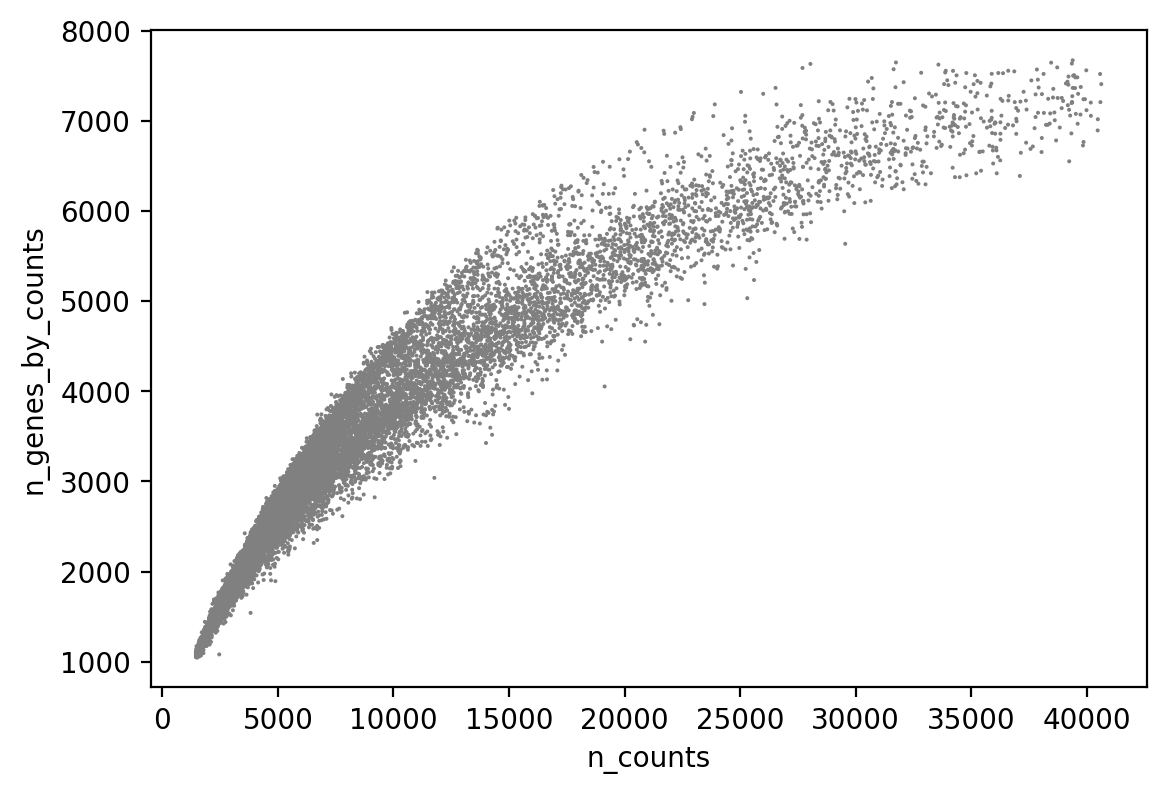

In [19]:
sc.pl.scatter(adata, x="n_counts", y="percent_mito")
sc.pl.scatter(adata, x="n_counts", y="n_genes_by_counts")

In [20]:
gc.collect()

12531

## Downsample data

In [21]:
adata.shape

(14442, 26747)

In [22]:
print([f"{celltype}: {len(adata.obs.major_clust[adata.obs.major_clust==celltype])}" for celltype in adata.obs.major_clust.unique()])

['L4_RORB: 3760', 'L5-6_TLE4: 2288', 'L5-6_THEMIS: 2459', 'L2-3_CUX2: 3362', 'PN_dev: 2573']


In [23]:
n_cells_downsample = 30000
if adata.shape[0] > n_cells_downsample:
    sc.pp.subsample(adata, n_obs=n_cells_downsample, random_state=123)

In [24]:
print([f"{celltype}: {len(adata.obs.major_clust[adata.obs.major_clust==celltype])}" for celltype in adata.obs.major_clust.unique()])

['L4_RORB: 3760', 'L5-6_TLE4: 2288', 'L5-6_THEMIS: 2459', 'L2-3_CUX2: 3362', 'PN_dev: 2573']


In [25]:
types = list(adata.obs.major_clust.unique())
types

['L4_RORB', 'L5-6_TLE4', 'L5-6_THEMIS', 'L2-3_CUX2', 'PN_dev']

# Normalize data

In [26]:
adata.raw = adata

In [27]:
adata.layers['counts'] = adata.X.copy()
sc.pp.filter_genes(adata, min_cells = 1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

print(adata.layers['counts'][:20, :20])
print(adata.X.data[:10])
print(adata.layers['ds_norm_cts'].data[:10])

  (0, 10)	1.0
  (1, 14)	2.0
  (1, 6)	1.0
  (2, 3)	1.0
  (3, 17)	2.0
  (3, 10)	1.0
  (3, 6)	1.0
  (5, 17)	1.0
  (7, 17)	1.0
  (7, 10)	1.0
  (9, 17)	1.0
  (10, 10)	2.0
  (10, 6)	1.0
  (11, 10)	1.0
  (11, 6)	1.0
  (12, 12)	1.0
  (12, 10)	1.0
  (13, 10)	1.0
  (14, 18)	1.0
  (14, 17)	1.0
  (14, 6)	1.0
  (15, 10)	1.0
  (15, 8)	1.0
  (15, 6)	1.0
  (15, 4)	1.0
  (16, 17)	1.0
  (17, 10)	3.0
  (18, 7)	1.0
  (19, 10)	1.0
[0.32868716 0.5756502  0.32868716 0.32868716 0.5756502  0.32868716
 0.32868716 0.32868716 0.5756502  0.5756502 ]
[6.90875478 6.90875478 6.90875478 6.90875478 8.00670085 6.90875478
 6.90875478 6.90875478 6.90875478 6.90875478]


In [28]:
gc.collect()

21667

In [29]:
sc.pp.highly_variable_genes(adata, inplace = True, n_top_genes=3000) #subset = True
adata

AnnData object with n_obs × n_vars = 14442 × 26609
    obs: 'batch', 'RL#', 'age', 'chem', 'concat_id', 'numerical_age', 'stage_id', 'Sex', 'Race', 'PMI', 'Brain Regions*', 'Cause of Death', 'ICD-10 Code', 'ICD-10 category', 'Oxygen/No Oxygen', 'Date-of-Collection', 'Collection_year', 'Library Prep Date', 'Library Prep Lot', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'doublet_score', 'log10_gene_counts', 'log10_UMI_counts', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden', 'mat/dev', 'cell_type', 'major_clust', 'sub_clust', 'combined-leiden', 'Astro_GFAP_dev-traj', 'Astro_SLC1A2_dev-traj', 'L2_CUX2_LAMP5_dev-traj', 'L3_CUX2_PRSS12_dev-traj', 'L4_RORB_LRRK1_dev-traj', 'L4_RORB_MET_dev-traj', 'L4_RORB_MME_dev-traj', 'L5-6_THEMIS_CNR1_dev-traj', 'L5-6_THEMIS_NTNG2_dev-traj', 'L5-6_TLE4_HTR2C_dev-traj', 'L5-6_TLE4_SCUBE1_dev-traj', 'L5-6_TLE4_SORCS1_dev-traj', 'Micro_dev-traj', 'OPC_dev-traj', 'OPC_MBP_dev-traj', 'Oligo_dev-traj', 'Vas_CLDN5_d

In [30]:
np.sum(adata.var['highly_variable'])

3000

# Pseudobulk

In [31]:
# Group cells by major_clust and calculate mean expression values
counts_data = adata.layers["ds_norm_cts"].toarray()
pseudobulk_df = pd.DataFrame(counts_data, index=adata.obs.index, columns=adata.var_names)
pseudobulk_df["major_clust"] = adata.obs["major_clust"]
pseudobulk_df = pseudobulk_df.groupby("major_clust").mean()

# Create a new AnnData object for pseudobulk data
pseudobulk_adata = sc.AnnData(X=pseudobulk_df.values, obs=pd.DataFrame(index=pseudobulk_df.index), var=pd.DataFrame(index=pseudobulk_df.columns))

/localscratch/14630221.michal.kubacki/ipykernel_1163924/829822108.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pseudobulk_df = pseudobulk_df.groupby("major_clust").mean()


In [32]:
pseudobulk_df.head()

,RP11-34P13.7,AL627309.1,RP11-34P13.14,AP006222.2,RP4-669L17.10,RP5-857K21.2,RP5-857K21.4,RP11-206L10.3,RP11-206L10.5,RP11-206L10.2,...,ZNF84-1,AL603926.1,AL592183.1,AC011841.1,AL354822.1,AL590523.1,PNRC2-1,SRSF10-1,AC145205.1,CU459201.1
major_clust,,,,,,,,,,,,,,,,,,,,,
L2-3_CUX2,0.000000,0.000000,0.0,0.074185,0.104803,0.000000,0.119189,0.0,0.004110,0.012330,...,0.004110,0.008220,0.581068,0.0,0.165428,0.0,0.006165,0.051374,0.004110,0.002055
L4_RORB,0.000000,0.003675,0.0,0.071660,0.102897,0.000000,0.160042,0.0,0.000000,0.003675,...,0.001837,0.005512,0.510455,0.0,0.066701,0.0,0.005512,0.023887,0.007350,0.000000
L5-6_THEMIS,0.000000,0.000000,0.0,0.118004,0.044953,0.000000,0.165766,0.0,0.005619,0.019667,...,0.005619,0.002810,0.632221,0.0,0.025286,0.0,0.008429,0.073049,0.008429,0.000000
L5-6_TLE4,0.003020,0.006039,0.0,0.069451,0.057675,0.006039,0.112026,0.0,0.000000,0.012079,...,0.006039,0.006039,0.636241,0.0,0.042577,0.0,0.024157,0.042274,0.012078,0.000000
PN_dev,0.010741,0.000000,0.0,0.093978,0.034907,0.000000,0.126470,0.0,0.000000,0.034907,...,0.010740,0.021481,0.697072,0.0,0.005370,0.0,0.008055,0.059073,0.002685,0.000000


In [33]:
pseudobulk_adata

AnnData object with n_obs × n_vars = 5 × 26609

### scRNAseq - receptors expression

In [44]:
gois = ["AR", "THRB", "ESR2", "NR1H3", "NR1H2", "RARA", "RARG", "AHR", "NR3C1"]
gois = ['AHR', 'AR', 'NR1I2', 'NR1I3', 'NR3C1', 'NR3C2', 'ESR1', 'RARA', 'ESR2', 'THRB', 'THRA']

In [45]:
gene_indexs = []
for goi in gois:
    try:
        index = np.where(adata.var_names == goi)[0][0]
        gene_indexs.append(index)
    except ValueError:
        print(f"{goi} index not found")
print(gene_indexs)

[9860, 11268, 5264, 1814, 7990, 6801, 9568, 21971, 18678, 4615, 21963]


#### Expression in metacells

In [46]:
for i, goi in enumerate(gois):
    expression_bulk = pseudobulk_adata.X[:,gene_indexs[i]]
    print([f"Expression of {goi} in {cell}: {expression}" for cell, expression in zip(pseudobulk_adata.obs_names, expression_bulk)])

['Expression of AHR in L2-3_CUX2: 0.06370386605000117', 'Expression of AHR in L4_RORB: 0.08856583085627208', 'Expression of AHR in L5-6_THEMIS: 0.084287776690032', 'Expression of AHR in L5-6_TLE4: 0.07246989257207052', 'Expression of AHR in PN_dev: 0.024166262151251096']
['Expression of AR in L2-3_CUX2: 0.06390988852331125', 'Expression of AR in L4_RORB: 0.04409896641123124', 'Expression of AR in L5-6_THEMIS: 0.019667053052137676', 'Expression of AR in L5-6_TLE4: 0.018117363931770682', 'Expression of AR in PN_dev: 0.010740388308301936']
['Expression of NR1I2 in L2-3_CUX2: 0.006164861492547787', 'Expression of NR1I2 in L4_RORB: 0.0036748695634655428', 'Expression of NR1I2 in L5-6_THEMIS: 0.0', 'Expression of NR1I2 in L5-6_TLE4: 0.006039121310590228', 'Expression of NR1I2 in PN_dev: 0.005370582611722708']
['Expression of NR1I3 in L2-3_CUX2: 0.010274769154246311', 'Expression of NR1I3 in L4_RORB: 0.0018374347817327714', 'Expression of NR1I3 in L5-6_THEMIS: 0.008429143488929543', 'Expressi

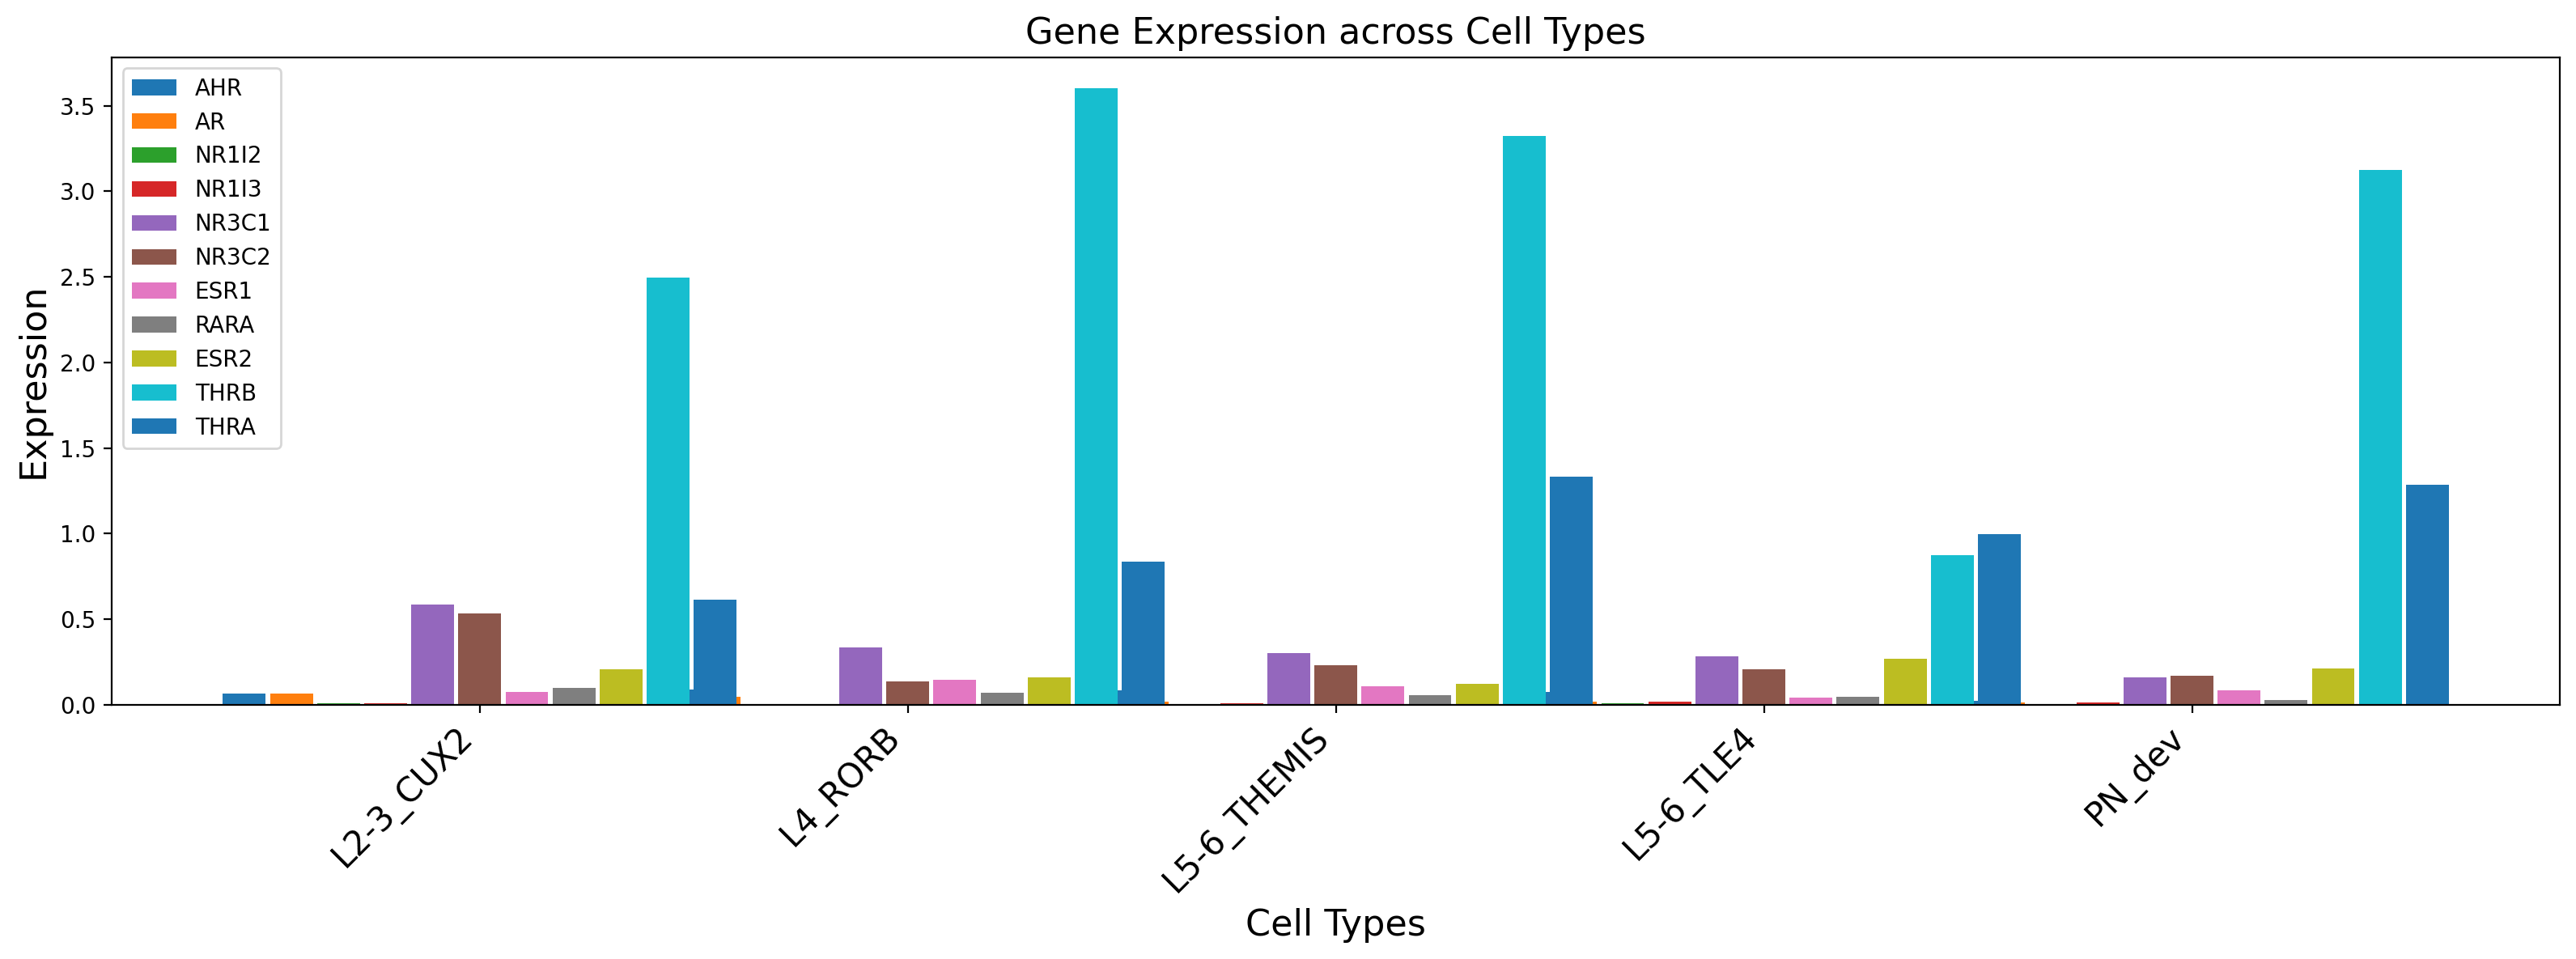

In [47]:
expression_data = [pseudobulk_adata.X[:,gene_indexs[i]] for i in range(0,len(gois))]
cell_types = pseudobulk_adata.obs_names

bar_width = 0.1
spacing = 0.01
fig, ax = plt.subplots(figsize=(16, 6))

x = np.arange(len(cell_types))
ax.set_xticks(x)
ax.set_xticklabels(cell_types, rotation=45, ha='right', fontsize=15)

for i, goi in enumerate(gois):
    offset = (i - (len(gois) - 1) / 2) * (bar_width + spacing)
    ax.bar(x + offset, expression_data[i], width=bar_width, label=goi)

ax.set_xlabel('Cell Types', fontsize=16)
ax.set_ylabel('Expression', fontsize=16)
ax.set_title('Gene Expression across Cell Types', fontsize=16)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
summed_counts = np.sum(counts_data, axis=0)
print(summed_counts.shape)
print(summed_counts)

(26609,)
[ 34.5457729   27.63501912   0.         ... 690.87847744  96.72256691
   6.90875478]


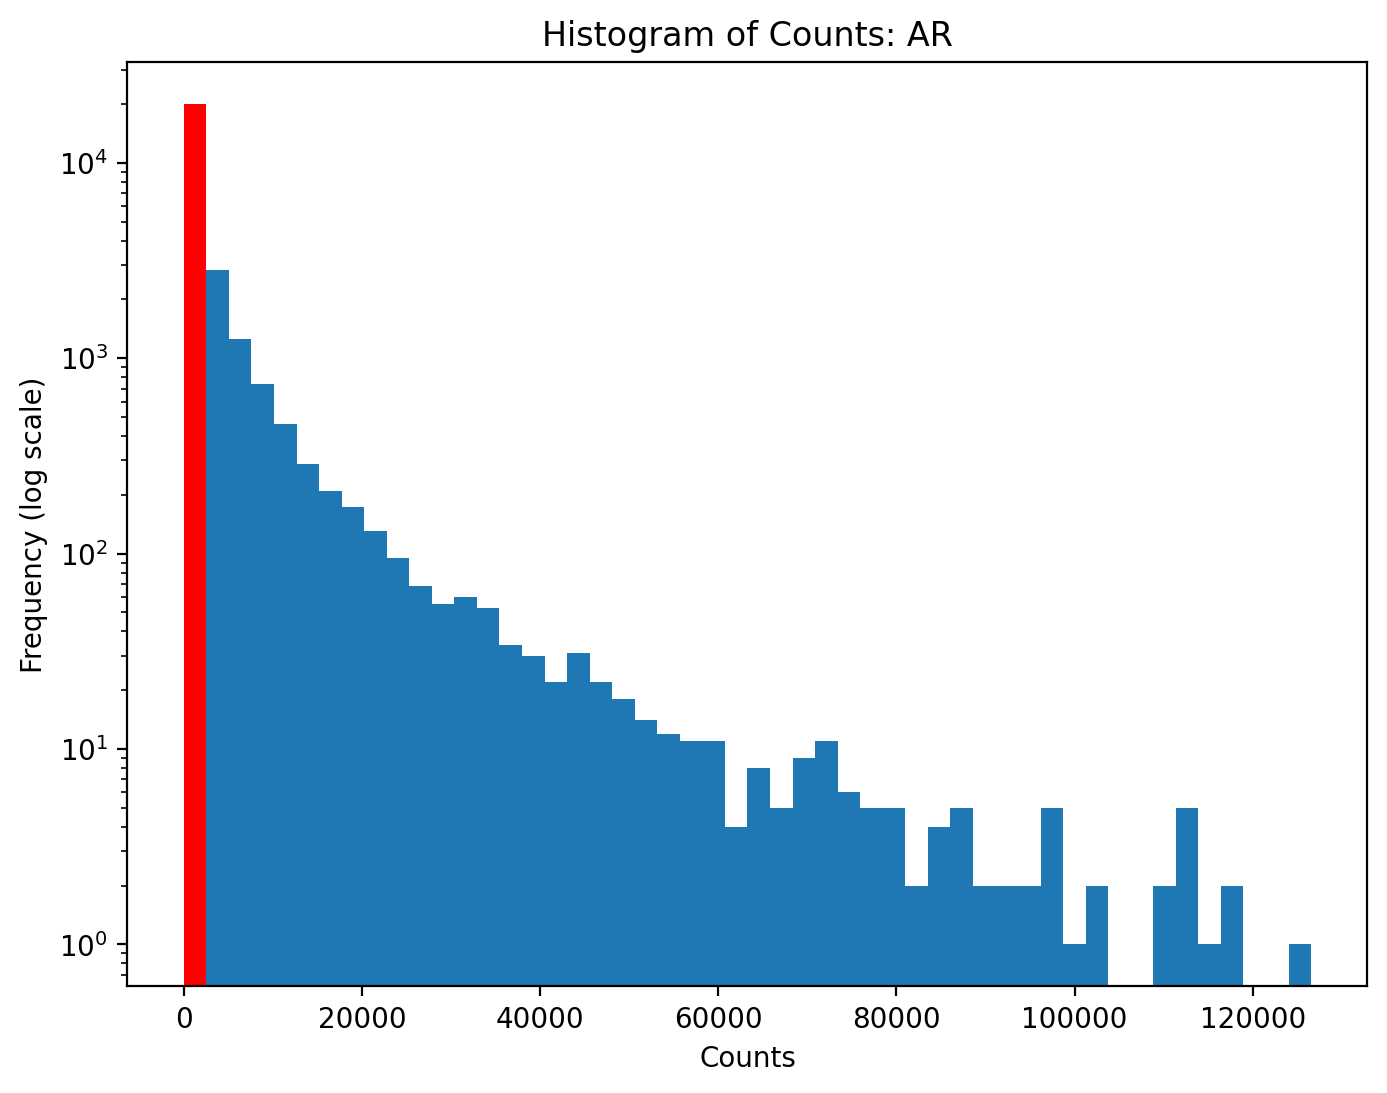

AR count: 498.12599016996137


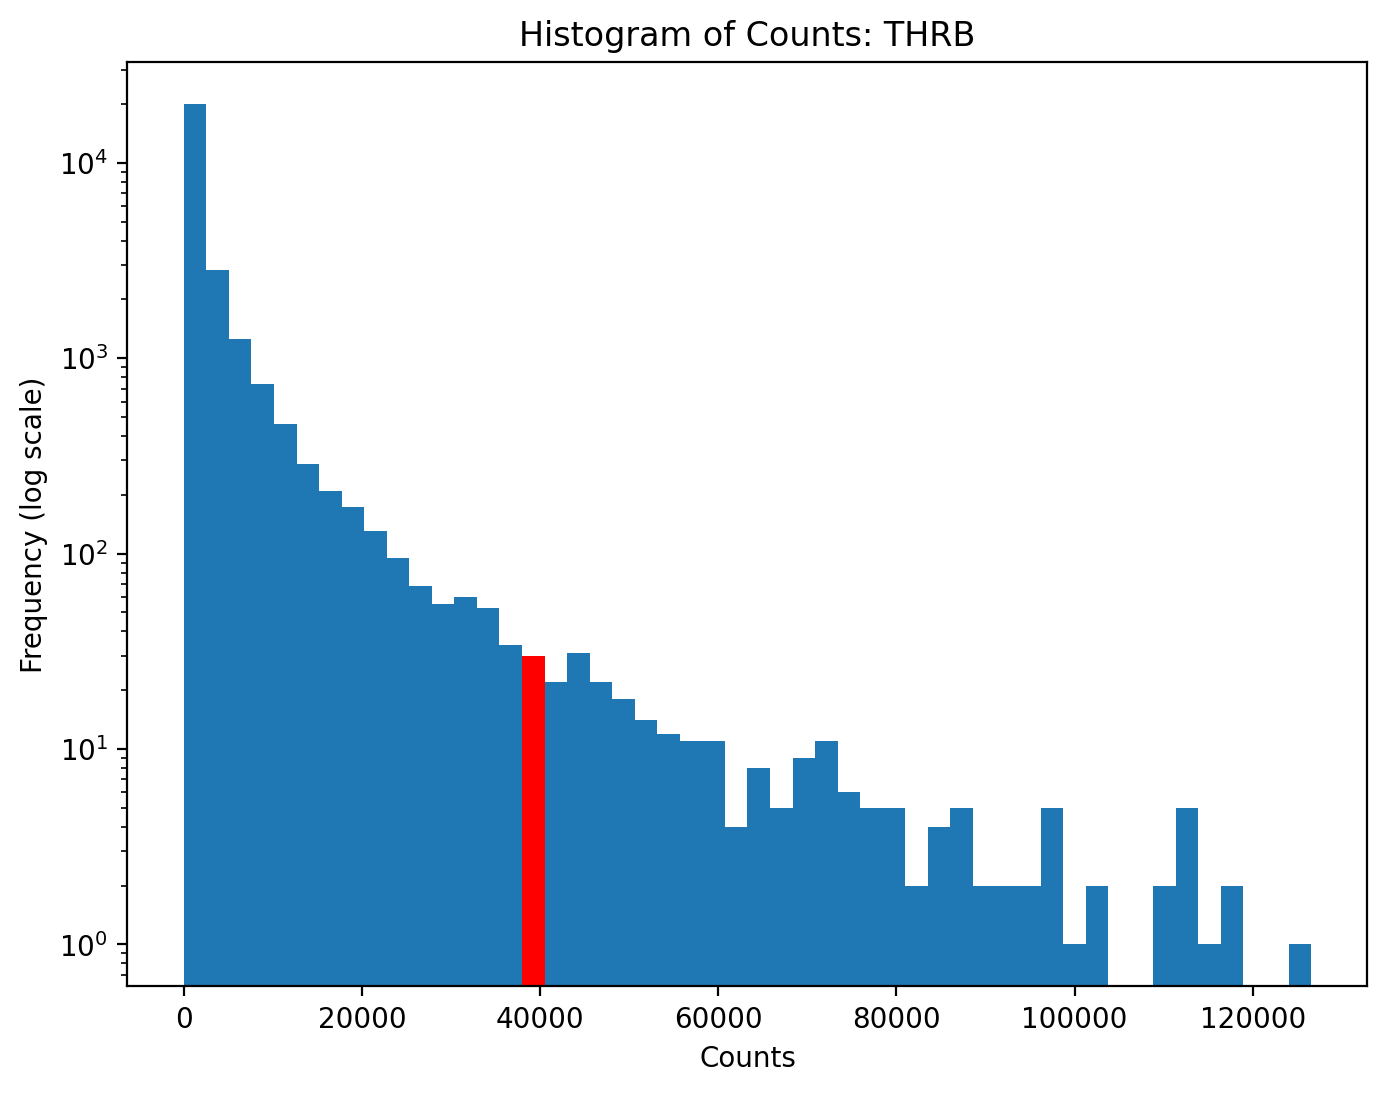

THRB count: 40156.69966698384


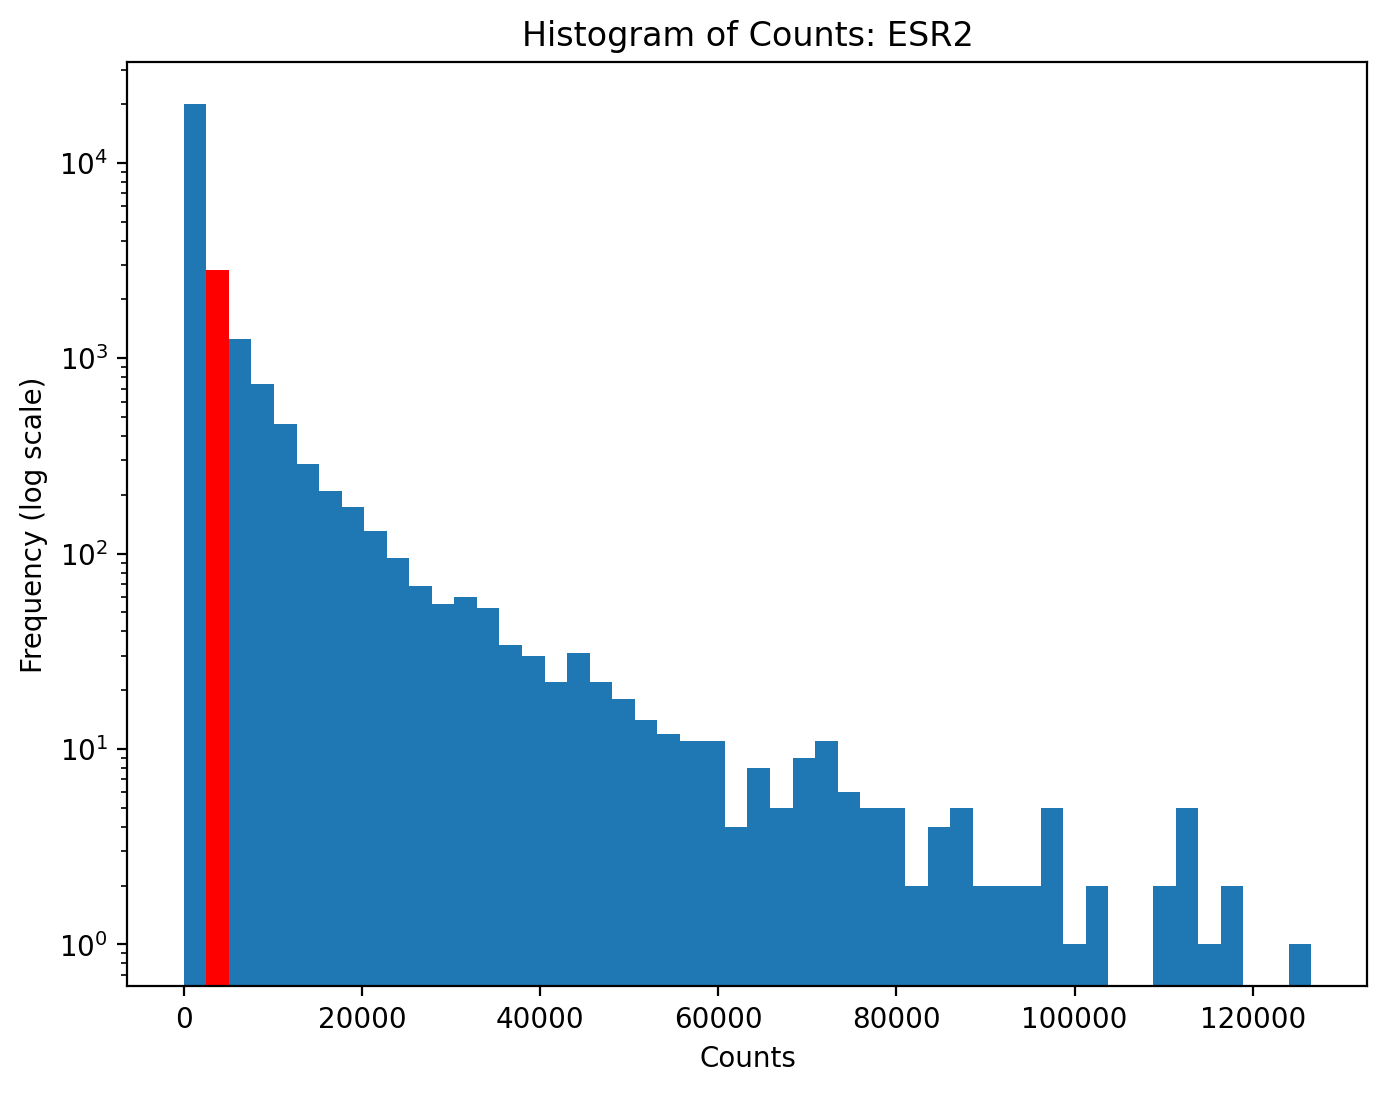

ESR2 count: 2749.7241124693664


In [ ]:
for i, gene_index in enumerate(gene_indexs[:3]):
    count = summed_counts[gene_index]
                               
    plt.figure(figsize=(8, 6))
    n, bins, patches = plt.hist(summed_counts, bins=50, log=True)
    
    # Find the bin index where the gene count falls into
    bin_index = np.where(bins <= count)[0][-1]
    patches[bin_index].set_facecolor('red')
    
    plt.xlabel("Counts")
    plt.ylabel("Frequency (log scale)")
    plt.title(f"Histogram of Counts: {gois[i]}")
    plt.show()
    print(f"{gois[i]} count: {count}")

In [ ]:
adata.shape

In [ ]:
file_name = os.path.join(output_dir, f"subseted_rna_andata.h5ad")
adata.write(file_name)

In [ ]:
output_dir

'/group/testa/michal.kubacki/herring/output_hg19_all_excitatory_all_ages/celloracle'